In [1]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


# Wordclouds for decades

In [2]:
# Import lyrics data
platinum_lyrics_df = pd.read_csv("https://platinum-lyric-bucket.s3.us-east-2.amazonaws.com/platinum_lyrics.csv")
platinum_lyrics_df.head()

,Unnamed: 0,track_id,artist_name,song_title,song_year,target_success,target_weeks,target_peak,abov,accept,...,yeah,year,yellow,yes,yesterday,yet,york,young,yourself,youth
0,0,TRAAAAV128F421A322,western addiction,a poor recipe for civic cohesion,2005,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,TRAAABD128F429CF47,the box tops,soul deep,1969,1,18,14,0,0,...,4,0,0,0,0,0,0,0,0,0
2,2,TRAAAGF12903CEC202,halvdan sivertsen,smã¥ ord,2005,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,TRAAAZF12903CCCF6B,matthew wilder,break my stride,1984,1,29,95,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,TRAABEV12903CC53A4,suicide commando,blood in face,2000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
def wordcloud_decade(decade):
    # filter by the decade
    decade_df = platinum_lyrics_df.loc[(platinum_lyrics_df['song_year'] >= decade) & (platinum_lyrics_df['song_year'] < decade + 10)]

    # filter by the decade
    decade_df = platinum_lyrics_df.loc[(platinum_lyrics_df['song_year'] >= decade) & (platinum_lyrics_df['song_year'] < decade + 10)]
    
    # drop non-word columns
    decade_df = decade_df.drop(['Unnamed: 0', 'track_id', 'artist_name', 'song_title', 'song_year', 'target_success', 'target_weeks', 'target_peak'], 1)

    # find the sum of the the colum for each word
    word_list = decade_df.sum().sort_values(ascending=False)

    # convert this list to a dataframe and select the top 30 words
    decade_df = pd.DataFrame({'word':word_list.index, 'count':word_list.values}).loc[30:45]

    # convert the df to a dict
    decade_dict = dict(zip(decade_df['word'].tolist(), decade_df['count'].tolist()))

    # https://stackoverflow.com/questions/57826063/how-to-create-a-wordcloud-according-to-frequencies-in-a-pandas-dataframe

    # define the word cloud
    wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(decade_dict)
    plt.figure(figsize=(10, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

1950 wordcloud:


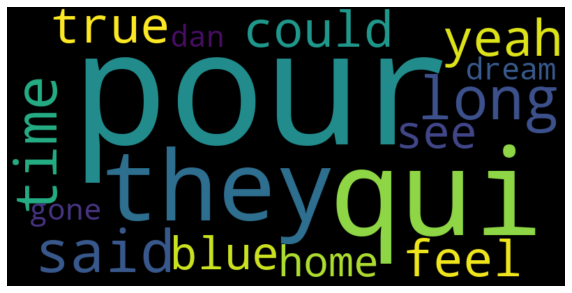

1960 wordcloud:


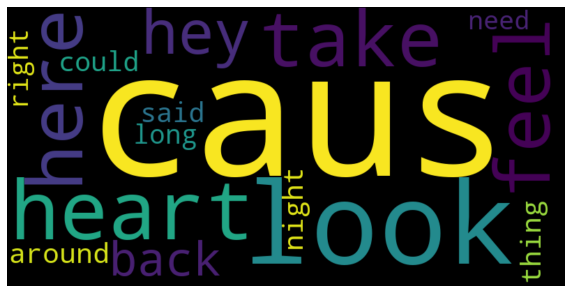

1970 wordcloud:


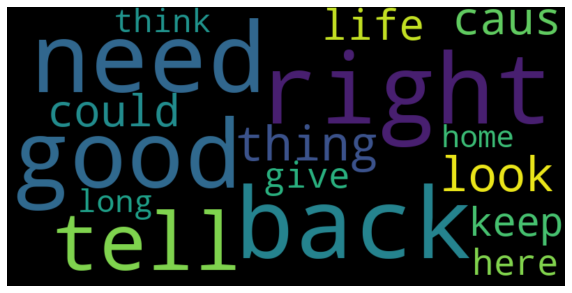

1980 wordcloud:


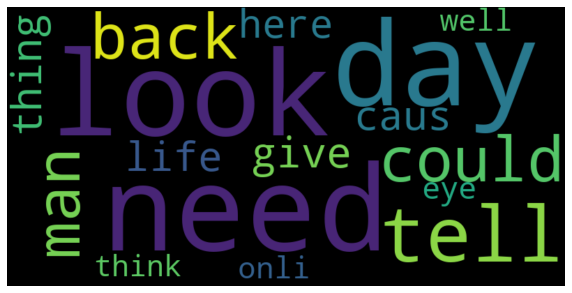

1990 wordcloud:


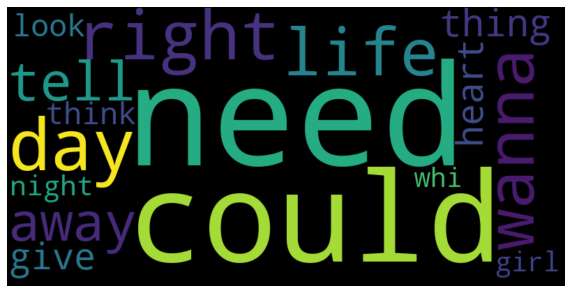

2000 wordcloud:


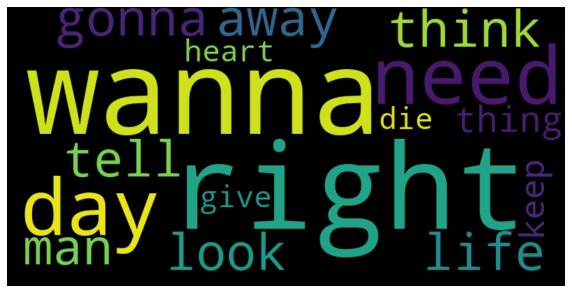

2010 wordcloud:


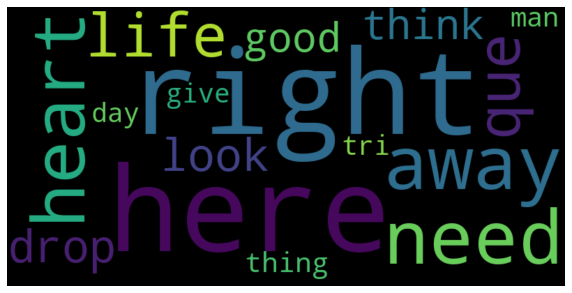

In [4]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]

for year in years:
    print(str(f'{year} wordcloud:'))
    wordcloud_decade(year)

# Wordclouds for genre

In [5]:
# Import features data
platinum_lyrics_features_df = pd.read_csv('https://platinum-lyric-bucket.s3.us-east-2.amazonaws.com/platinum_features.csv')
platinum_lyrics_features_df.head()

,Unnamed: 0,track_id,artist_name,song_title,song_year,feature_genre,feature_popularity,feature_duration,feature_key,feature_acousticness,...,feature_danceability,feature_energy,feature_liveness,feature_loudness,feature_speechiness,feature_valence,feature_explicit,target_success,target_weeks,target_peak
0,0,TRRBOBU128F4293068,texas,i don't want a lover,1989,country,61,300600,7,0.1960,...,0.756,0.470,0.1260,-12.615,0.0394,0.430,0,1,77,6
1,1,TRVCPQS128F4285928,the youngbloods,ride the wind,1988,rock,20,396600,2,0.9100,...,0.558,0.307,0.0866,-20.492,0.0343,0.674,0,0,0,0
2,2,TRZRMWW128F426E797,babyface,tender lover,1990,pop,37,259267,5,0.2260,...,0.743,0.860,0.0513,-6.346,0.0445,0.687,0,1,17,89
3,3,TRVSRVI128F4261843,reo speedwagon,one lonely night,1984,country,31,201467,5,0.0561,...,0.408,0.579,0.0712,-10.277,0.0260,0.397,0,1,19,16
4,4,TRSHXOI128F146B1AE,john waite,change,1982,rock,49,196693,11,0.2460,...,0.403,0.848,0.6160,-11.615,0.0625,0.622,0,1,54,10


In [6]:
def wordcloud_genre(genre):
    # filter by the genre
    df_genre = platinum_lyrics_features_df.loc[(platinum_lyrics_features_df['feature_genre'] == genre)]

    # drop non-word columns
    df_genre = df_genre.drop(['Unnamed: 0', 
                          'track_id', 
                          'artist_name', 
                          'song_title', 
                          'song_year', 
                          'target_success', 
                          'target_weeks', 
                          'target_peak',
                         'feature_genre',
                         'feature_popularity',
                         'feature_duration',
                         'feature_key',
                         'feature_acousticness',
                         'feature_instrumentalness',
                         'feature_tempo',
                         'feature_mode',
                         'feature_danceability',
                         'feature_energy',
                         'feature_energy',
                         'feature_loudness',
                         'feature_speechiness',
                         'feature_valence',
                         'feature_explicit'], 1)
    
    # find the sum of the the colum for each word
    word_list = df_genre.sum().sort_values(ascending=False)

    # convert this list to a dataframe and select the top 30 words
    df_genre = pd.DataFrame({'word':word_list.index, 'count':word_list.values}).loc[30:45]

    # convert the df to a dict
    genre_dict = dict(zip(df_genre['word'].tolist(), df_genre['count'].tolist()))
    
    # https://stackoverflow.com/questions/57826063/how-to-create-a-wordcloud-according-to-frequencies-in-a-pandas-dataframe

    # define the word cloud
    wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(genre_dict)
    plt.figure(figsize=(10, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [8]:
genres = ['folk', 'pop', 'blues', 'metal', 'country', 'rock', 'punk',
        'hip hop', 'electronic', 'latin', 'rap', 'jazz', 'reggae',
        'rhythm and blues', 'jam', 'edm']

for genre in genres:
    print(str(f'{genre} wordcloud:'))
    wordcloud_genre(genre)

folk wordcloud:


ValueError: We need at least 1 word to plot a word cloud, got 0.